In [1]:
# Imports
import numpy as np
import pandas as pd
import sklearn.metrics as skm
from statsmodels.tsa.vector_ar.var_model import VAR
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Define your path
path = "/Users/joche/Documents/GitHub/GVAR_modeling/"

# Data preperation

In [645]:
# Import all data for different variables
variable_list_raw = ['GDP', 'CPI','long_int','short_int','exch_rate','CPI_lag']
df_variable_raw = pd.read_excel(path + "Variable_data.xlsx",index_col=0, sheet_name=variable_list_raw)

# To prevent LinAlg errors:
df_variable_raw['exch_rate'].loc["United States"] += np.random.normal(0,0.01,df_variable_raw['exch_rate'].shape[1])
df_variable = {}

# Transformating the data
df_variable['GDP'] = np.log(df_variable_raw['GDP'] / df_variable_raw['CPI'])
df_variable['inf_rate'] = np.log(df_variable_raw['CPI']) - np.log(df_variable_raw['CPI_lag'])
df_variable['long_int'] = 1/12 * np.log(1+ df_variable_raw['long_int'])
df_variable['short_int'] = 1/12 * np.log(1+ df_variable_raw['short_int'])
df_variable['exch_rate'] = np.log(df_variable_raw['exch_rate']) - np.log(df_variable_raw['CPI'])
variable_list = np.array(['GDP', 'inf_rate','long_int','short_int','exch_rate'])
ext_variable_list = ['Real gross domestic product','Inflation rate','Long-term interest rate','Short-term interest rate','Real exchange rate']

In [176]:
# Example of the data of GDP
df_variable['GDP']

,1996-01-01,1996-02-01,1996-03-01,1996-04-01,1996-05-01,1996-06-01,1996-07-01,1996-08-01,1996-09-01,1996-10-01,...,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01
GDP,,,,,,,,,,,,,,,,,,,,,
Australia,7.111526,7.109974,7.109045,7.108639,7.108802,7.109724,7.111451,7.113886,7.117012,7.120009,...,7.245003,7.242691,7.240865,7.237977,7.234116,7.229641,7.224830,7.220180,7.215890,7.212375
Brazil,7.298547,7.265720,7.255515,7.248464,7.248838,7.252285,7.254880,7.258204,7.255993,7.247954,...,6.245628,6.238087,6.235718,6.230620,6.238351,6.242242,6.244860,6.238253,6.232938,6.225192
Canada,7.182050,7.181960,7.179124,7.179272,7.178639,7.181598,7.184533,7.187242,7.188597,7.188877,...,7.249739,7.246856,7.236032,7.232001,7.232621,7.237186,7.237162,7.230052,7.228093,7.232778
France,7.380348,7.374446,7.367507,7.366746,7.365897,7.368816,7.372472,7.375927,7.374124,7.372342,...,7.389731,7.387556,7.382731,7.376268,7.373598,7.368834,7.374215,7.363898,7.361342,7.363840
Germany,7.682714,7.688150,7.695440,7.699543,7.700288,7.699928,7.699483,7.701185,7.704330,7.707481,...,7.624106,7.616684,7.606889,7.607831,7.605180,7.603438,7.586272,7.577714,7.571316,7.566637
Italy,7.396040,7.389030,7.383779,7.379578,7.376119,7.374964,7.376462,7.375475,7.373617,7.371353,...,7.043788,7.048628,7.044076,7.034828,7.031480,7.023761,7.020841,6.986684,6.981243,6.978765
Japan,12.850322,12.864937,12.870368,12.868049,12.867329,12.870474,12.871490,12.873739,12.872666,12.874797,...,12.959260,12.960084,12.961055,12.962100,12.956011,12.949845,12.943860,12.937610,12.938058,12.942606
Korea,13.774596,13.780142,13.781106,13.780902,13.780954,13.786446,13.787371,13.788933,13.793843,13.800024,...,14.099692,14.094856,14.090692,14.086429,14.082658,14.084086,14.080734,14.076859,14.075656,14.070829
New Zealand,5.010273,5.009471,5.010367,5.012259,5.014867,5.017504,5.019902,5.021249,5.021431,5.020249,...,5.200104,5.201987,5.205242,5.206727,5.206079,5.203146,5.198064,5.190857,5.181424,5.169673


In [177]:
# Get all countries in a list
country_list = df_variable['GDP'].index.values

# Define an empty dataframe
df = {}

# Loop over all countries and put their variable data in dataframe df
for country in country_list:
    country_collection = []
    
    for variable in variable_list:
        country_collection.append(df_variable[variable].loc[country])
    
    df[country] = pd.DataFrame(country_collection,index=variable_list)

In [178]:
# Example of the data of the United States
df['United States']

,1996-01-01,1996-02-01,1996-03-01,1996-04-01,1996-05-01,1996-06-01,1996-07-01,1996-08-01,1996-09-01,1996-10-01,...,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01
GDP,9.442539,9.449189,9.451437,9.452844,9.454810,9.457333,9.458181,9.459295,9.459754,9.460273,...,9.439093,9.433012,9.422873,9.411266,9.414238,9.417735,9.418474,9.416719,9.418875,9.421459
inf_rate,0.005949,0.003243,0.005055,0.003914,0.001951,0.000557,0.001946,0.001943,0.003183,0.003173,...,0.013285,0.005597,0.010951,0.013633,-0.000147,-0.000368,0.002206,0.004032,-0.001025,-0.003081
long_int,0.010751,0.010992,0.011676,0.012210,0.012748,0.012210,0.011929,0.012239,0.011951,0.012225,...,0.008018,0.008026,0.008185,0.008652,0.009011,0.008637,0.008884,0.009168,0.008907,0.008981
short_int,0.004375,0.004185,0.004296,0.004351,0.004351,0.004430,0.004485,0.004383,0.004470,0.004391,...,0.000606,0.000755,0.001101,0.001544,0.002058,0.002269,0.002633,0.003148,0.003636,0.003676
exch_rate,-4.254785,-4.272673,-4.265339,-4.266858,-4.277405,-4.272103,-4.281399,-4.278249,-4.290250,-4.285455,...,-4.867272,-4.888431,-4.913224,-4.892796,-4.903825,-4.914571,-4.917634,-4.919489,-4.911708,-4.910409


# Trade matrix

In [179]:
# Import all trading data
df_trade_raw = pd.read_excel(path + "Trade_statistics.xlsx",index_col=[0,1])

# Get a list of all years (data from 1993 until 2022)
year_list = df_trade_raw.columns

# Define an empty dataframe
df_trade_year = {} 

# Loop over all years and put the trade weights data of that year in dataframe df_trade_year
for year in year_list:
    country_collection = []
    
    for country in country_list:
        country_collection.append(df_trade_raw.loc[country, year] / np.sum(df_trade_raw.loc[country, year]))
    
    df_trade_year[year] = pd.DataFrame(country_collection,index=country_list)

In [180]:
# Example of the trade weights on the year 2000
df_trade_year[2000]

,Australia,Brazil,Canada,France,Germany,Italy,Japan,Korea,New Zealand,South Africa,Spain,United Kingdom,United States
Australia,0.000000,0.009499,0.024256,0.015715,0.022248,0.031067,0.368421,0.139010,0.109102,0.021377,0.012284,0.063816,0.183204
Brazil,0.012822,0.000000,0.021274,0.065131,0.095000,0.080711,0.092992,0.021844,0.001296,0.011364,0.037926,0.056359,0.503281
Canada,0.003000,0.002689,0.000000,0.004871,0.007887,0.004335,0.022968,0.005707,0.000482,0.000620,0.001581,0.014831,0.931028
France,0.006890,0.014365,0.014387,0.000000,0.277243,0.155041,0.027482,0.013763,0.001199,0.006146,0.160982,0.169509,0.152993
Germany,0.011850,0.017602,0.015107,0.236602,0.000000,0.158056,0.046231,0.015814,0.001668,0.013074,0.093985,0.173398,0.216612
Italy,0.013134,0.016574,0.015812,0.224279,0.267343,0.000000,0.029327,0.012335,0.001646,0.006712,0.111315,0.121739,0.179782
Japan,0.034618,0.010164,0.030154,0.030228,0.080685,0.023379,0.000000,0.123875,0.005102,0.007577,0.013335,0.059860,0.581023
Korea,0.031966,0.021146,0.029763,0.021458,0.063209,0.023418,0.251006,0.000000,0.003509,0.006069,0.018803,0.065981,0.463673
New Zealand,0.302224,0.003885,0.022302,0.022475,0.034591,0.025347,0.205571,0.065756,0.000000,0.005530,0.008444,0.082456,0.221417
South Africa,0.042235,0.017777,0.019369,0.047268,0.167820,0.074288,0.119648,0.052628,0.002717,0.000000,0.043997,0.199527,0.212726


In [181]:
# Define the normal trade weight (which is an average of the last three years)
df_trade = (df_trade_year[1993] + df_trade_year[1994] + df_trade_year[1995])/3

# Potentially save this trade matrix
# df_trade.to_excel(path + "saved_values.xlsx")

# Show the chosen trade matrix
df_trade

,Australia,Brazil,Canada,France,Germany,Italy,Japan,Korea,New Zealand,South Africa,Spain,United Kingdom,United States
Australia,0.000000,0.008695,0.031125,0.020313,0.027501,0.029473,0.422486,0.132150,0.115496,0.012373,0.007620,0.067694,0.125073
Brazil,0.012786,0.000000,0.024467,0.046825,0.103713,0.080085,0.136933,0.034136,0.001838,0.011543,0.039634,0.063569,0.444472
Canada,0.004381,0.004788,0.000000,0.006822,0.012462,0.006200,0.048321,0.010508,0.000680,0.000768,0.001999,0.015696,0.887375
France,0.007999,0.007755,0.012718,0.000000,0.317674,0.173072,0.035865,0.012381,0.001229,0.006044,0.129186,0.174254,0.121825
Germany,0.015579,0.018173,0.013884,0.262833,0.000000,0.165993,0.058338,0.024076,0.002175,0.016558,0.073423,0.176180,0.172786
Italy,0.011154,0.017354,0.015598,0.230207,0.336073,0.000000,0.037012,0.015691,0.001984,0.007676,0.082110,0.112037,0.133103
Japan,0.040304,0.009912,0.029764,0.027565,0.092120,0.017409,0.000000,0.121341,0.007258,0.010393,0.010995,0.063685,0.569254
Korea,0.027392,0.018277,0.031319,0.023447,0.093984,0.016194,0.287797,0.000000,0.003286,0.007146,0.013616,0.042586,0.434957
New Zealand,0.313003,0.005407,0.025821,0.017027,0.037556,0.020387,0.237031,0.075653,0.000000,0.003830,0.006465,0.091912,0.165908
South Africa,0.029227,0.024074,0.012801,0.063221,0.153470,0.093988,0.105488,0.054068,0.002478,0.000000,0.046956,0.234887,0.179344


# VARX model

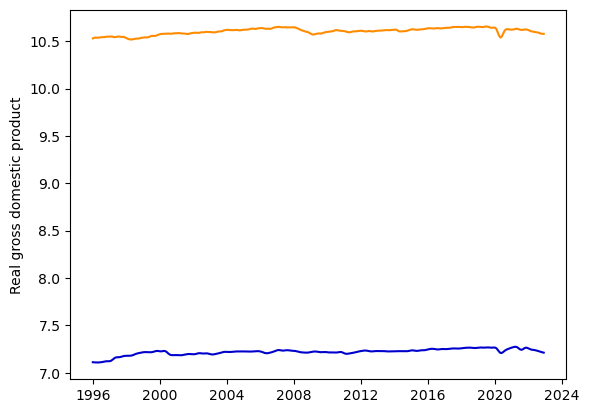

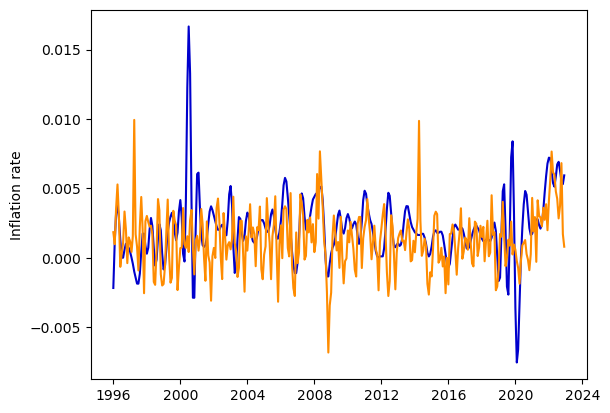

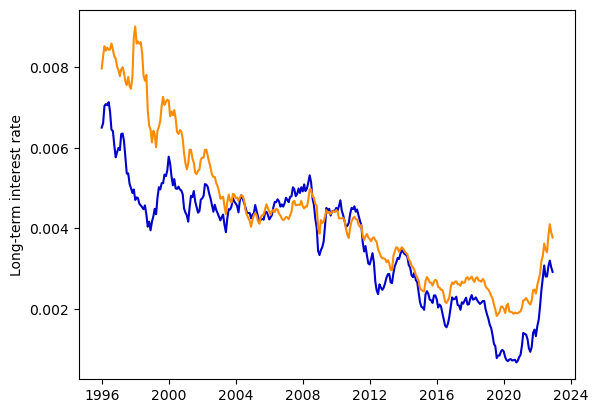

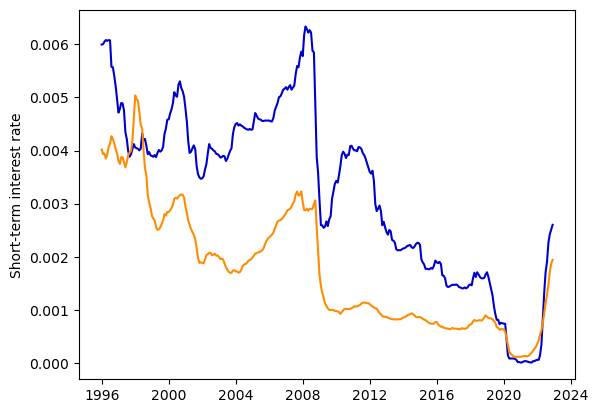

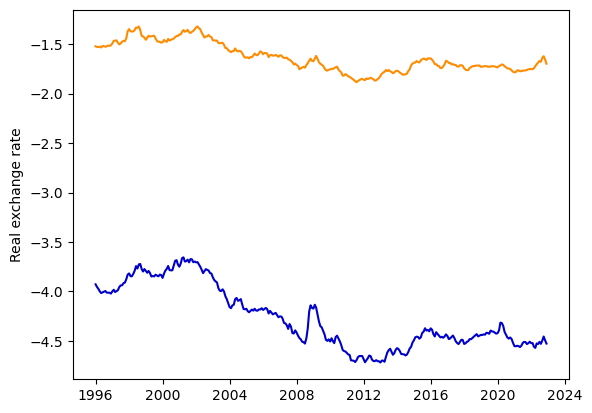

In [182]:
# Define the country
country = 'Australia'

# Define the x_it and x_star for a country
x_it = df[country].T
x_star = sum(df[foreign_country].T * df_trade.loc[country][foreign_country] for foreign_country in country_list)

# Plot x_it and x_star for every variable
for i in range(len(variable_list)):
    sns.lineplot(x_it[variable_list[i]],c='mediumblue')
    sns.lineplot(x_star[variable_list[i]],c='darkorange')
    plt.ylabel(ext_variable_list[i])
    plt.show()

# Determine the lag order

In [183]:
lag_dict = {}

for country in country_list:
    x_it = df[country].T
    x_it.index.freq = 'MS'
    x_it.columns = x_it.columns + "_x_it"
    
    x_star = sum(df[foreign_country].T * df_trade.loc[country][foreign_country] for foreign_country in country_list)
    x_star.index.freq = 'MS'
    x_star.columns = x_star.columns + "_x_star"

    max_lags = 5
    
    min_bic = 0

    for lag_x_it in range(1,max_lags+1):
        for lag_x_star in range(1,max_lags+1):
            
            df_country = pd.concat([x_star])
            df_country.columns += "_L0"
    
            for lag in range(1,lag_x_it+1):
                lagged_x_it = x_it.shift(lag)
                lagged_x_it.columns += "_L"+str(lag) 
                df_country = pd.concat([df_country,lagged_x_it], axis=1)
                
            for lag in range(1,lag_x_star+1):
                lagged_x_star = x_star.shift(lag)
                lagged_x_star.columns += "_L"+str(lag) 
                df_country = pd.concat([df_country,lagged_x_star], axis=1)
    
            model = VAR(endog = x_it.iloc[max_lags:], exog = df_country.iloc[max_lags:])
            results = model.fit(maxlags=0,trend='ct')
            
            results_bic = -2 * results.llf / 5 + (2 + 5 * (lag_x_it+lag_x_star+1)) * np.log(324)
            
            if (results_bic < min_bic):
                min_bic = results_bic
                best_lag_bic = (lag_x_it,lag_x_star)
    
    print("For",country)
    print("The lag order by BIC is ",best_lag_bic)
    lag_dict[country] = best_lag_bic
    print(min_bic)
    print("")

For Australia
The lag order by BIC is  (4, 1)
-3702.7765642732493

For Brazil
The lag order by BIC is  (4, 1)
-2988.254147432601

For Canada
The lag order by BIC is  (4, 4)
-3492.0141275415053

For France
The lag order by BIC is  (4, 4)
-3826.5377287243045

For Germany
The lag order by BIC is  (4, 4)
-3602.5650782665816

For Italy
The lag order by BIC is  (4, 4)
-3787.0610694594425

For Japan
The lag order by BIC is  (4, 1)
-3481.926754009934

For Korea
The lag order by BIC is  (4, 1)
-3286.4095559028647

For New Zealand
The lag order by BIC is  (4, 4)
-3585.2486275966

For South Africa
The lag order by BIC is  (3, 3)
-3177.455565182995

For Spain
The lag order by BIC is  (4, 4)
-3766.7649366622977

For United Kingdom
The lag order by BIC is  (4, 4)
-3298.117709999206

For United States
The lag order by BIC is  (4, 4)
-3466.87161455681



In [184]:
lag_dict = {}

for country in country_list:
    x_it = df[country].T
    x_it.index.freq = 'MS'
    x_it.columns = x_it.columns + "_x_it"
    
#     x_star = sum(df[foreign_country].T * df_trade.loc[country][foreign_country] for foreign_country in country_list)
    x_star = pd.concat([sum(df[foreign_country].T.loc[str(year)] * ((df_trade_year[year-1]+df_trade_year[year-2]+df_trade_year[year-3])/3).loc[country][foreign_country] for foreign_country in country_list) for year in year_list[3:]])
    x_star.index.freq = 'MS'
    x_star.columns = x_star.columns + "_x_star"

    max_lags = 5
    
    min_bic = 0

    for lag_x_it in range(1,max_lags+1):
        for lag_x_star in range(1,max_lags+1):
            
            df_country = pd.concat([x_star])
            df_country.columns += "_L0"
    
            for lag in range(1,lag_x_it+1):
                lagged_x_it = x_it.shift(lag)
                lagged_x_it.columns += "_L"+str(lag) 
                df_country = pd.concat([df_country,lagged_x_it], axis=1)
                
            for lag in range(1,lag_x_star+1):
                lagged_x_star = x_star.shift(lag)
                lagged_x_star.columns += "_L"+str(lag) 
                df_country = pd.concat([df_country,lagged_x_star], axis=1)
    
            model = VAR(endog = x_it.iloc[max_lags:], exog = df_country.iloc[max_lags:])
            results = model.fit(maxlags=0,trend='ct')
            
            results_bic = -2 * results.llf / 5 + (2 + 5 * (lag_x_it+lag_x_star+1)) * np.log(324)
            
            if (results_bic < min_bic):
                min_bic = results_bic
                best_lag_bic = (lag_x_it,lag_x_star)
    
    print("For",country)
    print("The lag order by BIC is ",best_lag_bic)
    lag_dict[country] = best_lag_bic
    print(min_bic)
    print("")
    

For Australia
The lag order by BIC is  (4, 1)
-3690.08497143803

For Brazil
The lag order by BIC is  (4, 1)
-2988.69185444513

For Canada
The lag order by BIC is  (4, 1)
-3440.6868112339716

For France
The lag order by BIC is  (4, 1)
-3675.480125589505

For Germany
The lag order by BIC is  (4, 1)
-3509.9733816089038

For Italy
The lag order by BIC is  (4, 1)
-3594.731069498189

For Japan
The lag order by BIC is  (4, 1)
-3470.9090607169173

For Korea
The lag order by BIC is  (4, 1)
-3277.44418894745

For New Zealand
The lag order by BIC is  (4, 1)
-3563.198179944046

For South Africa
The lag order by BIC is  (4, 1)
-3084.4329012289095

For Spain
The lag order by BIC is  (4, 1)
-3555.7289082049765

For United Kingdom
The lag order by BIC is  (4, 1)
-3180.390778301141

For United States
The lag order by BIC is  (4, 1)
-3389.322099483919



In [122]:
lag_dict

{'Australia': (4, 1),
 'Brazil': (4, 1),
 'Canada': (4, 4),
 'France': (4, 4),
 'Germany': (4, 4),
 'Italy': (4, 4),
 'Japan': (4, 1),
 'Korea': (4, 1),
 'New Zealand': (4, 4),
 'South Africa': (3, 3),
 'Spain': (4, 4),
 'United Kingdom': (4, 4),
 'United States': (4, 4)}

# Test order of integration

In [160]:
df_test_lag0 = pd.DataFrame(index=variable_list)
adf_test_lag0 = pd.DataFrame(index=variable_list)

df_test_lag1 = pd.DataFrame(index=variable_list)
adf_test_lag1 = pd.DataFrame(index=variable_list)

df_test_lag2 = pd.DataFrame(index=variable_list)
adf_test_lag2 = pd.DataFrame(index=variable_list)

for country in country_list:
    for variable in variable_list:
        non_dif = df[country].loc[variable]
        first_dif = np.diff(non_dif)
        second_dif = np.diff(first_dif)
        
        df_test_lag0.loc[variable,country] = round(sm.tsa.stattools.adfuller(non_dif)[0],4)
        adf_test_lag0.loc[variable,country] = round(sm.tsa.stattools.adfuller(non_dif, autolag= 'AIC')[0],4)
        df_test_lag1.loc[variable,country] = round(sm.tsa.stattools.adfuller(first_dif)[0],4)
        adf_test_lag1.loc[variable,country] = round(sm.tsa.stattools.adfuller(first_dif, autolag= 'AIC')[0],4)
        df_test_lag2.loc[variable,country] = round(sm.tsa.stattools.adfuller(second_dif)[0],4)
        adf_test_lag2.loc[variable,country] = round(sm.tsa.stattools.adfuller(second_dif, autolag= 'AIC')[0],4)

In [161]:
adf_test_lag0

,Australia,Brazil,Canada,France,Germany,Italy,Japan,Korea,New Zealand,South Africa,Spain,United Kingdom,United States
GDP,-3.1057,0.1496,-3.0631,-2.3034,-1.0403,-0.0138,-2.0241,-0.9533,-2.4282,0.4797,-0.6159,-1.1979,-1.6928
inf_rate,-5.7527,-7.9096,-8.4993,-0.9158,-2.6653,0.4373,-3.6672,-3.4371,-4.4376,-3.1846,-2.2048,0.0330,-2.8725
long_int,-2.4422,-1.9876,-1.9147,-1.8955,-3.5135,-2.3885,-1.9587,-1.9610,-2.0618,-2.3500,-1.7005,-1.6669,-1.8079
short_int,-2.1072,-1.9430,-2.3956,-1.9001,-1.8714,-3.1065,-1.7197,-2.5788,-2.5977,-2.2737,-2.3738,-1.7072,-2.6898
exch_rate,-1.1820,-1.7037,-1.2071,-1.3193,-1.2920,-1.3677,-2.2854,-1.8667,-1.0583,-2.3204,-1.1633,-2.6018,0.7905


In [162]:
adf_test_lag1

,Australia,Brazil,Canada,France,Germany,Italy,Japan,Korea,New Zealand,South Africa,Spain,United Kingdom,United States
GDP,-4.8130,-5.0142,-10.6136,-10.5088,-5.5581,-5.5460,-6.5082,-4.7671,-4.6167,-8.7045,-4.8101,-8.9072,-8.3430
inf_rate,-9.4909,-10.3613,-6.7862,-13.0273,-6.8464,-4.2525,-5.1504,-5.5021,-3.6847,-7.7936,-6.9489,-0.4882,-6.9366
long_int,-9.0882,-9.3945,-7.2302,-7.2875,-6.9210,-4.2239,-2.1001,-9.5227,-3.2099,-7.2874,-9.3727,-4.8540,-11.0710
short_int,-5.8162,-3.5351,-5.5055,-5.8753,-5.8821,-4.0052,-8.2123,-7.7368,-5.9607,-4.8578,-5.9766,-7.0190,-4.5546
exch_rate,-9.5853,-8.7293,-8.8994,-9.5282,-9.6491,-9.5594,-3.7414,-11.7973,-8.7982,-10.0704,-9.5659,-7.3354,-4.5531


In [164]:
adf_test_lag2

,Australia,Brazil,Canada,France,Germany,Italy,Japan,Korea,New Zealand,South Africa,Spain,United Kingdom,United States
GDP,-6.3154,-7.1806,-5.9377,-4.9730,-12.4600,-5.6235,-4.8571,-6.2353,-6.4179,-6.6752,-3.9297,-5.3576,-5.2692
inf_rate,-6.6374,-7.0416,-7.2590,-6.6734,-5.7675,-7.3398,-5.4474,-7.3078,-6.9017,-6.5570,-6.3163,-5.0052,-5.6485
long_int,-6.7316,-8.8772,-6.6116,-5.2381,-7.9408,-5.6415,-6.5384,-7.6617,-7.4093,-6.7239,-6.9602,-5.3458,-7.9063
short_int,-6.8289,-9.2788,-7.8671,-5.9435,-5.9962,-5.7441,-8.0336,-9.5346,-5.6415,-4.7508,-5.8657,-8.5720,-9.4135
exch_rate,-7.2462,-6.5375,-5.0845,-8.6900,-8.5987,-8.7660,-11.4977,-5.9075,-7.2236,-7.3086,-8.6561,-7.0431,-4.2007


# Checking weights

In [282]:
lag_x_it = 4
lag_x_star = 4
max_lag = max(lag_x_it,lag_x_star)

# Define a dataframe (dictionary) for the parameter estimates and the R_squared
df_estimates = {}
df_Rsquared_fixed = pd.DataFrame(index=variable_list)

# Loop over all countries
for country in country_list:

    x_it = df[country].T
    x_it.index.freq = 'MS'
    x_it.columns = x_it.columns + "_x_it"
    
    x_star = sum(df[foreign_country].T * df_trade.loc[country][foreign_country] for foreign_country in country_list)
    x_star.index.freq = 'MS'
    x_star.columns = x_star.columns + "_x_star"
    
    df_country = pd.concat([x_star])
    df_country.columns += "_L0"
    
    for lag in range(1,lag_x_it+1):
        lagged_x_it = x_it.shift(lag)
        lagged_x_it.columns += "_L"+str(lag) 
        df_country = pd.concat([df_country,lagged_x_it], axis=1)
                
    for lag in range(1,lag_x_star+1):
        lagged_x_star = x_star.shift(lag)
        lagged_x_star.columns += "_L"+str(lag) 
        df_country = pd.concat([df_country,lagged_x_star], axis=1)
    
    model = VAR(endog = x_it.iloc[max_lags:], exog = df_country.iloc[max_lags:])
    results = model.fit(maxlags=0,trend='ct')

    # Calculate all R^2's of all variables
    for variable in variable_list:
        df_Rsquared_fixed.loc[variable,country] = skm.r2_score(results.fittedvalues[variable+"_x_it"]+results.resid[variable+"_x_it"],results.fittedvalues[variable+"_x_it"])

In [283]:
lag_x_it = 4
lag_x_star = 4
max_lag = max(lag_x_it,lag_x_star)

# Define a dataframe (dictionary) for the parameter estimates and the R_squared
df_estimates = {}
df_Rsquared_vary = pd.DataFrame(index=variable_list)

# Loop over all countries
for country in country_list:

    x_it = df[country].T
    x_it.index.freq = 'MS'
    x_it.columns = x_it.columns + "_x_it"
    
    x_star = pd.concat([sum(df[foreign_country].T.loc[str(year)] * ((df_trade_year[year-1]+df_trade_year[year-2]+df_trade_year[year-3])/3).loc[country][foreign_country] for foreign_country in country_list) for year in year_list[3:]])
    x_star.index.freq = 'MS'
    x_star.columns = x_star.columns + "_x_star"
    
    df_country = pd.concat([x_star])
    df_country.columns += "_L0"
    
    for lag in range(1,lag_x_it+1):
        lagged_x_it = x_it.shift(lag)
        lagged_x_it.columns += "_L"+str(lag) 
        df_country = pd.concat([df_country,lagged_x_it], axis=1)
                
    for lag in range(1,lag_x_star+1):
        lagged_x_star = x_star.shift(lag)
        lagged_x_star.columns += "_L"+str(lag) 
        df_country = pd.concat([df_country,lagged_x_star], axis=1)
    
    model = VAR(endog = x_it.iloc[max_lags:], exog = df_country.iloc[max_lags:])
    results = model.fit(maxlags=0,trend='ct')

    # Calculate all R^2's of all variables
    for variable in variable_list:
        df_Rsquared_vary.loc[variable,country] = skm.r2_score(results.fittedvalues[variable+"_x_it"]+results.resid[variable+"_x_it"],results.fittedvalues[variable+"_x_it"])

In [168]:
df_Rsquared_fixed

,Australia,Brazil,Canada,France,Germany,Italy,Japan,Korea,New Zealand,South Africa,Spain,United Kingdom,United States
GDP,0.936648,0.998579,0.955033,0.979483,0.944108,0.997442,0.971385,0.990010,0.972606,0.998071,0.991357,0.986475,0.968908
inf_rate,0.342108,0.413404,0.629024,0.771403,0.360479,0.493069,0.445333,0.367680,0.510456,0.371535,0.851885,0.731371,0.664604
long_int,0.970169,0.979219,0.981343,0.990977,0.960420,0.946490,0.963041,0.971667,0.969657,0.980948,0.974168,0.965958,0.937773
short_int,0.978125,0.823508,0.983876,0.997949,0.996042,0.996711,0.958465,0.946867,0.983954,0.943056,0.998353,0.992436,0.976344
exch_rate,0.986971,0.947276,0.985474,0.998902,0.996954,0.998776,0.902114,0.930118,0.989494,0.916940,0.999307,0.965902,0.993348


In [170]:
df_Rsquared_vary

,Australia,Brazil,Canada,France,Germany,Italy,Japan,Korea,New Zealand,South Africa,Spain,United Kingdom,United States
GDP,0.908089,0.998292,0.927813,0.904186,0.899346,0.992457,0.958466,0.990585,0.955663,0.994492,0.986481,0.956461,0.922715
inf_rate,0.295108,0.402279,0.645841,0.808611,0.359164,0.470813,0.346369,0.392870,0.521572,0.288683,0.849623,0.685234,0.628770
long_int,0.976484,0.979464,0.983293,0.991505,0.962723,0.948381,0.963235,0.970574,0.971108,0.979681,0.976193,0.965566,0.935948
short_int,0.977574,0.834809,0.983276,0.997893,0.996049,0.996422,0.959355,0.943352,0.983104,0.942744,0.997835,0.992677,0.972771
exch_rate,0.984999,0.945514,0.984306,0.997479,0.991707,0.996342,0.885651,0.927874,0.990739,0.915507,0.998663,0.965517,0.993486


# Fitting the model

In [506]:
lag_x_it = 4
lag_x_star = 4
max_lag = max(lag_x_it,lag_x_star)

# Define a dataframe (dictionary) for the parameter estimates and the R_squared
df_estimates = {}
df_Rsquared = pd.DataFrame(index=variable_list)
resid_dict = {}

# Loop over all countries
for country in country_list:

    x_it = df[country].T
    x_it.index.freq = 'MS'
    x_it.columns = x_it.columns + "_x_it"
    
    x_star = sum(df[foreign_country].T * df_trade.loc[country][foreign_country] for foreign_country in country_list)
    x_star.index.freq = 'MS'
    x_star.columns = x_star.columns + "_x_star"
    
    df_country = pd.concat([x_star])
    df_country.columns += "_L0"
    
    for lag in range(1,lag_x_it+1):
        lagged_x_it = x_it.shift(lag)
        lagged_x_it.columns += "_L"+str(lag) 
        df_country = pd.concat([df_country,lagged_x_it], axis=1)
                
    for lag in range(1,lag_x_star+1):
        lagged_x_star = x_star.shift(lag)
        lagged_x_star.columns += "_L"+str(lag) 
        df_country = pd.concat([df_country,lagged_x_star], axis=1)
        
    model = VAR(endog = x_it.iloc[max_lag:], exog = df_country.iloc[max_lag:])
    results = model.fit(maxlags=0,trend='ct')

    # Fill the parameter estimates of the VARX model in the dictionary
    df_estimates[country] = results.params[x_it.columns.tolist()].T

    resid_dict[country] = results.resid
    
    # Calculate all R^2's of all variables
    for variable in variable_list:
        df_Rsquared.loc[variable,country] = skm.r2_score(results.fittedvalues[variable+"_x_it"]+results.resid[variable+"_x_it"],results.fittedvalues[variable+"_x_it"])

In [507]:
# Example of the VARX estimates of Australia
df_estimates['France']

,const,trend,GDP_x_star_L0,inf_rate_x_star_L0,long_int_x_star_L0,short_int_x_star_L0,exch_rate_x_star_L0,GDP_x_it_L1,inf_rate_x_it_L1,long_int_x_it_L1,...,GDP_x_star_L3,inf_rate_x_star_L3,long_int_x_star_L3,short_int_x_star_L3,exch_rate_x_star_L3,GDP_x_star_L4,inf_rate_x_star_L4,long_int_x_star_L4,short_int_x_star_L4,exch_rate_x_star_L4
GDP_x_it,0.129908,-9.740591e-07,1.332998,0.325674,1.507630,-0.360867,-0.005341,2.941168,2.371025,0.731512,...,-3.647786,-0.980656,-0.356686,-5.691730,0.030022,0.995719,0.056398,-0.432930,4.296788,0.009954
inf_rate_x_it,-0.125711,8.263989e-06,-0.115504,0.895604,-1.514209,-0.019244,0.004690,-0.049228,-0.468519,-0.704902,...,0.627917,0.140176,0.503655,4.793290,-0.042114,-0.119398,-0.023232,0.051815,-3.636003,-0.015604
long_int_x_it,0.001208,-4.959344e-07,0.008143,0.012639,0.504686,0.336355,-0.000720,-0.003068,0.002375,1.067783,...,-0.011778,0.002660,-0.064640,-0.357427,-0.000463,0.001309,-0.002584,-0.014710,0.172958,0.001238
short_int_x_it,0.001592,-1.136682e-07,-0.000261,-0.001824,0.018264,0.933066,-0.000121,-0.001914,-0.000428,-0.037355,...,0.003347,0.002034,0.011969,-0.204545,-0.000415,-0.002255,0.000501,-0.017076,0.127020,0.000108
exch_rate_x_it,0.219797,-9.107162e-06,0.656552,0.981400,-3.008675,8.062645,1.272902,-0.077118,0.284715,-0.073178,...,-1.181470,-0.360362,1.997626,5.598169,-0.232073,-0.093446,-0.166838,-3.213274,-1.547550,0.177937


In [508]:
# Example of the VARX estimates of New Zealand
df_estimates['New Zealand']

,const,trend,GDP_x_star_L0,inf_rate_x_star_L0,long_int_x_star_L0,short_int_x_star_L0,exch_rate_x_star_L0,GDP_x_it_L1,inf_rate_x_it_L1,long_int_x_it_L1,...,GDP_x_star_L3,inf_rate_x_star_L3,long_int_x_star_L3,short_int_x_star_L3,exch_rate_x_star_L3,GDP_x_star_L4,inf_rate_x_star_L4,long_int_x_star_L4,short_int_x_star_L4,exch_rate_x_star_L4
GDP_x_it,-0.078297,3.626690e-06,1.496977,1.488589,0.193875,-0.806258,0.005956,3.015117,-0.454330,0.152880,...,-3.906178,-1.075962,0.265551,1.249702,-0.004961,1.074023,0.017164,-0.266815,-0.189580,0.011814
inf_rate_x_it,-0.010811,-1.648368e-06,-0.022253,0.019946,-0.041259,0.326331,0.000835,-0.034588,2.412507,-0.022673,...,0.127426,0.048514,0.036456,-0.892668,0.005039,-0.032711,-0.015202,0.001862,0.661544,-0.004576
long_int_x_it,-0.007162,3.397884e-08,-0.003460,-0.013358,0.560826,0.153701,-0.000201,-0.007751,0.016086,1.107376,...,0.042997,0.018472,-0.072819,0.252255,-0.001680,-0.014452,0.001410,0.042585,-0.065720,-0.000030
short_int_x_it,-0.002176,-7.474092e-07,0.010329,0.016040,0.035954,0.880558,0.001200,-0.001618,0.031282,-0.004993,...,-0.003905,0.005337,0.045366,0.626760,0.000832,0.001080,0.000972,-0.050941,-0.503159,-0.000343
exch_rate_x_it,-1.128061,-1.570917e-05,-1.250875,0.309067,-6.865420,-35.142832,1.279500,0.132605,6.858354,10.572478,...,2.942775,2.583304,3.933836,-14.519696,0.325270,-1.024553,-0.267922,7.525169,9.253843,-0.157447


# Stacking the GVAR model

In [509]:
k = len(variable_list) * len(country_list)
k_i = k_star = len(variable_list)

In [510]:
matrix_col = []

for country in country_list:
    matrix_col.append(df_estimates[country].loc[:,"const"])
a_0 = pd.concat(matrix_col)


matrix_col = []

for country in country_list:
    matrix_col.append(df_estimates[country].loc[:,"trend"])
a_1 = pd.concat(matrix_col)

epsilon_t = pd.concat(resid_dict.values(), axis=1).T

In [512]:
def create_G_j(j):
    
    matrix_col = []

    for country in country_list:
        i = np.where(country_list == country)[0][0]
        E_i = np.hstack((np.zeros((k_i, i * k_i)), np.eye(k_i), np.zeros((k_i, (13-i-1) * k_i))))
        W_i = np.hstack([foreign_trade * np.eye(k_star) for foreign_trade in df_trade.loc[country]])
        Omega_i = np.vstack((E_i,W_i))
        
        if (j == 0):
            selected_cols = [col for col in df_estimates[country].columns if col.endswith("x_star_L0")]
            
            lambda_i = df_estimates[country].loc[:,selected_cols]
            A_i = np.hstack((np.eye(k_i),-lambda_i))
        else:
            selected_cols = [col for col in df_estimates[country].columns if col.endswith("x_it_L"+str(j))]
            phi_i = df_estimates[country].loc[:,selected_cols]
            
            selected_cols = [col for col in df_estimates[country].columns if col.endswith("x_star_L"+str(j))]
            lambda_i = df_estimates[country].loc[:,selected_cols]
            
            A_i = np.hstack((phi_i,lambda_i))
        G_i = A_i @ Omega_i
        matrix_col.append(G_i)
    
    return np.vstack(matrix_col)

G_0 = create_G_j(j=0)
G_1 = create_G_j(j=1)
G_2 = create_G_j(j=2)
G_3 = create_G_j(j=3)
G_4 = create_G_j(j=4)

In [513]:
def x_t(l,t): 
    return pd.concat([df[country].T for country in country_list],axis=1).T.iloc[:,max_lag+t-l]

In [517]:
t = 0    # until: t = 319
print(G_0 @ x_t(0,t) - a_0 - a_1 * (t+1) - G_1 @ x_t(1,t) -  G_2 @ x_t(2,t) - G_3 @ x_t(3,t) -  G_4 @ x_t(4,t))

GDP_x_it         -0.000801
inf_rate_x_it     0.000203
long_int_x_it     0.000055
short_int_x_it    0.000029
exch_rate_x_it   -0.029633
                    ...   
GDP_x_it          0.001837
inf_rate_x_it    -0.002085
long_int_x_it    -0.000100
short_int_x_it    0.000279
exch_rate_x_it   -0.001872
Length: 65, dtype: float64


In [515]:
epsilon_t

,1996-05-01,1996-06-01,1996-07-01,1996-08-01,1996-09-01,1996-10-01,1996-11-01,1996-12-01,1997-01-01,1997-02-01,...,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01
GDP_x_it,0.000062,-0.000049,-0.000320,-0.000583,-0.000541,-0.000679,-0.001339,-0.000868,0.000414,0.000773,...,-0.000464,-0.001720,0.000672,0.000016,0.000473,-0.000285,-0.000469,0.000337,-0.000801,-0.000358
inf_rate_x_it,-0.000613,-0.000022,-0.000141,0.000194,-0.000200,-0.000120,0.000101,0.000456,-0.000081,0.000228,...,-0.000263,0.000636,-0.000108,0.000344,-0.000086,0.000130,0.000105,-0.000319,0.000203,0.000363
long_int_x_it,0.000045,0.000260,-0.000131,-0.000352,0.000153,-0.000223,-0.000117,0.000332,0.000169,0.000050,...,0.000051,0.000061,0.000182,0.000176,-0.000160,0.000119,0.000065,0.000150,0.000055,-0.000008
short_int_x_it,-0.000047,0.000051,0.000097,-0.000443,0.000255,-0.000086,0.000041,-0.000082,-0.000008,0.000189,...,-0.000087,-0.000024,0.000200,0.000264,0.000116,-0.000032,0.000199,-0.000037,0.000029,0.000023
exch_rate_x_it,-0.001565,-0.004559,0.015343,0.016249,-0.007192,0.012352,-0.012760,-0.011960,0.006543,-0.020684,...,-0.023562,-0.014147,0.018550,-0.032778,0.002797,-0.021149,-0.014996,-0.008229,-0.029633,0.001399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GDP_x_it,0.001108,-0.000267,-0.001581,-0.000855,-0.001288,-0.001598,-0.000651,0.001329,0.000590,-0.001388,...,0.000236,0.004783,-0.001204,-0.003955,0.001373,-0.001942,-0.001966,0.001630,0.001837,-0.002082
inf_rate_x_it,-0.001744,-0.000213,0.001198,0.000692,0.001125,0.001376,0.000375,-0.001551,-0.000290,0.001755,...,-0.000803,-0.004890,0.001500,0.004581,-0.001026,0.002296,0.002639,-0.001461,-0.002085,0.001461
long_int_x_it,0.000096,-0.000645,-0.000156,0.000040,-0.000230,0.000314,0.000094,-0.000063,-0.000091,-0.000572,...,0.000211,-0.000401,0.000137,0.000094,0.000128,-0.000266,0.000078,-0.000208,-0.000100,0.000224
short_int_x_it,0.000060,-0.000043,0.000080,-0.000101,0.000233,0.000089,0.000117,0.000008,0.000149,-0.000007,...,0.000076,-0.000113,0.000100,0.000053,-0.000026,0.000035,0.000045,0.000099,0.000279,-0.000186


In [571]:
G_0_inv = np.linalg.inv(create_G_j(j=0))

In [572]:
def create_F_l(l):
    return G_0_inv @ create_G_j(j=l)

In [584]:
F_l_dict = {}

for j in range(5):
    F_l_dict[j] = G_0_inv @ create_G_j(j=j)

def create_F_l(l):
    return F_l_dict[l]

# GIRF

In [556]:
def calculate_R_h(h):

    if (h < 0):
        return np.zeros((k,k))
    
    elif (h == 0):
        return np.eye(k)
    
    else:
        R_sum = sum([create_F_l(l) @ calculate_R_h(h-l) for l in range(1,max_lag+1)])
            
        return R_sum

In [610]:
def calculate_R_h(h, memo={}):
    if h in memo:
        return memo[h]

    if h < 0:
        memo[h] = np.zeros((k,k))
    elif h == 0:
        memo[h] = np.eye(k)
    else:
        memo[h] = sum([create_F_l(l) @ calculate_R_h(h-l) for l in range(1,max_lag+1)])
    
    return memo[h]


In [564]:
calculate_R_h(h=3)

array([[ 6.29298377e+00, -4.93541687e-02, -8.07370355e-01, ...,
        -2.30262884e+00, -4.32087155e+00,  1.68830370e-02],
       [-1.55674649e-01,  2.13397684e+00, -1.32362697e+00, ...,
        -1.51424677e-01, -5.58342619e-01,  2.58410006e-04],
       [-2.41461663e-03,  1.32042484e-01,  8.76390357e-01, ...,
        -7.23603924e-02,  8.24138512e-02,  3.64897892e-04],
       ...,
       [ 6.55355927e-03,  2.67653338e-02,  7.03091753e-02, ...,
         8.77276497e-01,  4.06969713e-01, -5.04595947e-04],
       [-2.10720124e-03,  3.13483665e-02,  1.46093851e-02, ...,
        -1.31173874e-01,  1.44670091e+00, -2.22922144e-03],
       [-8.98853833e-02, -1.76302818e+00, -1.05230643e-01, ...,
         2.09659085e+00,  5.50308612e+00,  1.82137558e-01]])

In [576]:
Sigma = np.cov(epsilon_t)

In [612]:
e_j = np.zeros((k,1))
e_j[63] = 1
e_j


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [604]:
def calculate_GIRF(h):
    numerator = calculate_R_h(h) @ G_0_inv @ Sigma @ e_j
    denominator = np.sqrt(e_j.T @ Sigma @ e_j)

    return numerator / denominator 

In [652]:
def create_shock(country_shock,variable_shock):
    country_i = np.where(country_list == country_shock)[0][0]
    variable_i = np.where(variable_list == variable_shock)[0][0]

    e_j = np.zeros((k,1))
    e_j[country_i * 5 + variable_i] = 1
    return e_j

In [725]:
def var_choice(country_choice,variable_choice):

    index_array = []
    name_array = []
    
    for variable in variable_choice:
        for country in country_choice:
            country_i = np.where(country_list == country)[0][0]
            variable_i = np.where(variable_list == variable)[0][0]
            index_array.append(country_i * 5 + variable_i)
            name_array.append(country[:3]+" "+variable)
    
    return index_array, name_array

# Choose shock:
Countries: ['Australia' 'Brazil' 'Canada' 'France' 'Germany' 'Italy' 'Japan' 'Korea'
 'New Zealand' 'South Africa' 'Spain' 'United Kingdom' 'United States']
 
Variable: ['GDP', 'inf_rate', 'long_int', 'short_int', 'exch_rate']

In [748]:
country_shock = "France"
variable_shock = 'GDP'
e_j = create_shock(country_shock,variable_shock)

[]

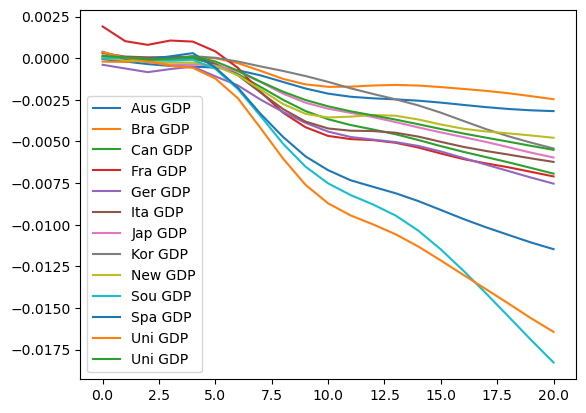

In [749]:
country_choice = country_list#np.array(["Australia","Brazil","United States","Germany"])
variable_choice = np.array(["GDP"])

index_array, name_array = var_choice(country_choice,variable_choice)

max_h = 20

girf_matrix = np.hstack([calculate_GIRF(h) for h in range(0,max_h+1)])

for i in range(len(index_array)):
    sns.lineplot(girf_matrix[index_array[i]], label=name_array[i])
plt.plot()
# girf_matrix[:10].T